In [42]:
import json
import requests
import os
import zipfile
import geopandas as gpd 
import pandas as pd
import io
#import contextily as cx
import numpy as np

In [46]:
df_qro = pd.read_csv('/work/Quéretaro/conjunto_de_datos_ageb_urbana_22_cpv2020.csv')
df_qro

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,22,Querétaro,0,Total de la entidad Querétaro,0,Total de la entidad,0000,0,2368467,1211647,...,289497,606978,430045,382086,183742,106431,22702,44358,208004,9228
1,22,Querétaro,1,Amealco de Bonfil,0,Total del municipio,0000,0,66841,34606,...,1740,12954,1926,3018,327,341,1708,3769,14205,1047
2,22,Querétaro,1,Amealco de Bonfil,1,Total de la localidad urbana,0000,0,7953,4224,...,885,1882,934,1032,208,157,68,142,979,16
3,22,Querétaro,1,Amealco de Bonfil,1,Total AGEB urbana,0042,0,84,43,...,5,18,8,6,4,3,3,0,9,0
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,*,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29813,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,62,7,*,...,*,*,*,*,*,*,*,*,*,*
29814,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,63,10,*,...,*,*,*,*,*,*,*,*,*,*
29815,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,64,27,13,...,*,8,*,*,*,0,*,0,4,0
29816,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,65,7,*,...,*,*,*,*,*,*,*,*,*,*


In [49]:
df_qro_limpio = df_qro[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB', "MZA",'POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_qro_limpio = df_qro_limpio.replace('*', pd.NA)
df_qro_limpio

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,P_12A14_F,...,P_3A5,P12YM_CASA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS
0,22,Querétaro,0,Total de la entidad Querétaro,0,Total de la entidad,0000,0,2368467,58214,...,119277,1016504,2025357,131596,3952,197324,1210328,10.48,208004,1873160
1,22,Querétaro,1,Amealco de Bonfil,0,Total del municipio,0000,0,66841,2008,...,4297,27458,59664,3643,8,3464,32979,7.24,14205,51533
2,22,Querétaro,1,Amealco de Bonfil,1,Total de la localidad urbana,0000,0,7953,214,...,361,3186,7412,246,<NA>,286,4034,9.9,979,5753
3,22,Querétaro,1,Amealco de Bonfil,1,Total AGEB urbana,0042,0,84,3,...,3,31,78,0,0,6,41,11.17,9,45
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29813,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,62,7,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
29814,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,63,10,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
29815,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,64,27,0,...,<NA>,14,27,0,0,0,15,8,4,24
29816,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,65,7,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [52]:
series_religiones = df_qro_limpio['PCATOLICA'].astype("Int64") + df_qro_limpio['PRO_CRIEVA'].astype("Int64") + df_qro_limpio['POTRAS_REL'].astype("Int64")
series_12_a_49 = df_qro_limpio['P_12A14_F'].astype("Int64") + df_qro_limpio['P_15A49_F'].astype("Int64")
series_0_a_5 = df_qro_limpio['P_0A2'].astype("Int64")+df_qro_limpio['P_3A5'].astype("Int64")
df_qro_limpio.insert(14,'PCON_RELIG',series_religiones)
df_qro_limpio.insert(9,'P_12A49_F',series_12_a_49)
df_qro_limpio.insert(24,'P_0A5',series_0_a_5)
df_qro_limpio=df_qro_limpio.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5',"P_0A2"],axis=1)
#df_qro_limpio.rename(columns={'PDER_SS':'Personas_C/Servicio de Salud','VPH_SINCINT': 'Personas_S/Internet','GRAPROES': 'Prom_Grado_Escolar','POCUPADA': 'Personas_Ocupadas','POBTOT': 'Poblacion_Total','P12YM_CASA': 'Personas_Casadas','P_0A2': 'Poblacion_de_0_a_5','PSIN_RELIG':'Personas_s/religion','PROM_HNV':'Promedio_de_nacidos','GRAP':'Personas_Separadas'},inplace =True)
df_qro_limpio.query("~NOM_LOC.str.startswith('Total')",inplace=True)
df_qro_limpio.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,2,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,3,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,4,15,<NA>,6,15,0,5,10.22,<NA>,9,<NA>
8,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,5,19,<NA>,5,13,6,11,13.14,<NA>,10,0


In [56]:
df_qro_limpio['CVEGEO'] = df_qro_limpio['ENTIDAD'].map(str).str.zfill(2) + df_qro_limpio['MUN'].map(str).str.zfill(3) + df_qro_limpio['LOC'].map(str).str.zfill(4) + df_qro_limpio['AGEB'].map(str).str.zfill(4) + df_qro_limpio['MZA'].map(str).str.zfill(3)
df_qro_limpio.drop(columns = ["ENTIDAD","NOM_ENT","MUN","NOM_MUN","LOC","NOM_LOC","AGEB","MZA"], inplace = True, axis = 1)
df = df_qro_limpio
df

,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5,CVEGEO
4,13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2200100010042001
5,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2200100010042002
6,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2200100010042003
7,15,<NA>,6,15,0,5,10.22,<NA>,9,<NA>,2200100010042004
8,19,<NA>,5,13,6,11,13.14,<NA>,10,0,2200100010042005
...,...,...,...,...,...,...,...,...,...,...,...
29813,7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220180050011A062
29814,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220180050011A063
29815,27,6,14,27,0,15,8,4,24,<NA>,220180050011A064
29816,7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,220180050011A065


In [59]:
df2 = df.drop(columns = ["CVEGEO"])
df2

,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5
4,13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,15,<NA>,6,15,0,5,10.22,<NA>,9,<NA>
8,19,<NA>,5,13,6,11,13.14,<NA>,10,0
...,...,...,...,...,...,...,...,...,...,...
29813,7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
29814,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
29815,27,6,14,27,0,15,8,4,24,<NA>
29816,7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
df2 = df2.astype("Float64")

In [8]:
df2.dtypes

POBTOT         Float64
P_12A49_F      Float64
P12YM_CASA     Float64
PCON_RELIG     Float64
PSIN_RELIG     Float64
POCUPADA       Float64
GRAPROES       Float64
VPH_SINCINT    Float64
PDER_SS        Float64
P_0A5          Float64
dtype: object

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

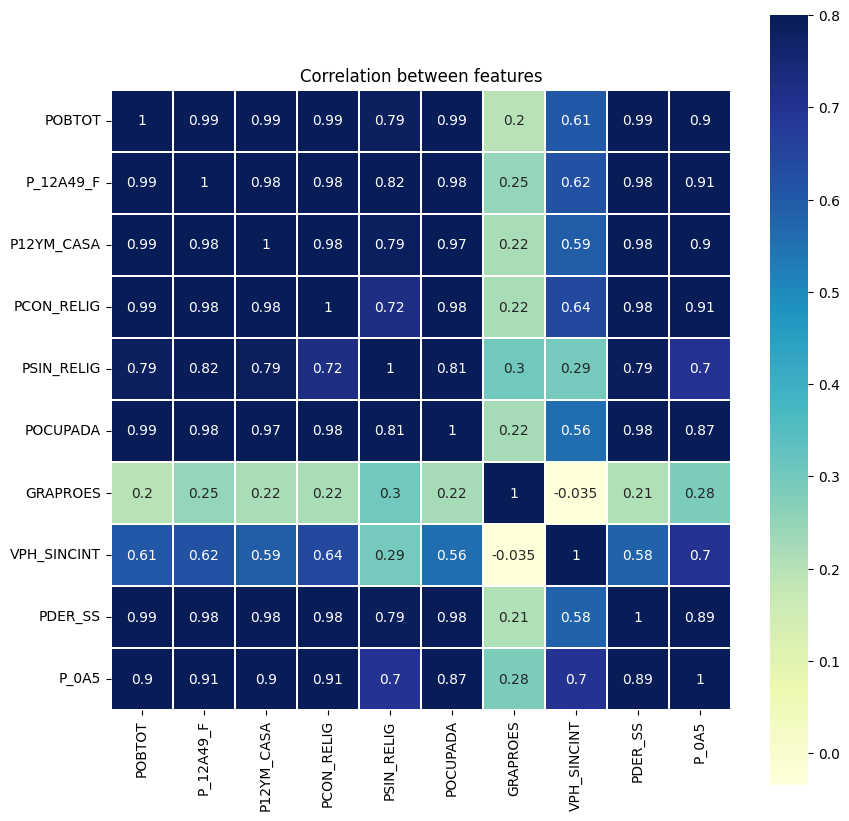

In [10]:
corr=df2.corr()
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
plt.show()

In [11]:
df2 = df2.drop(columns = ["PSIN_RELIG", 'GRAPROES', 'VPH_SINCINT'])
df2.head()

,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,POCUPADA,PDER_SS,P_0A5
4,13.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,3.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,10.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,15.0,<NA>,6.0,15.0,5.0,9.0,<NA>
8,19.0,<NA>,5.0,13.0,11.0,10.0,0.0


In [12]:
df2.insert(0, "CVEGEO", df["CVEGEO"])

In [13]:
df2 = df2.dropna(subset=["P_0A5"])
df3 = df2.drop(columns = "CVEGEO")

In [14]:
medias = df3.mean()
medias

POBTOT        90.205156
P_12A49_F      30.24481
P12YM_CASA     38.95266
PCON_RELIG    78.486144
POCUPADA      47.365368
PDER_SS       71.680465
P_0A5          8.927946
dtype: Float64

In [15]:
df3.fillna(medias, inplace=True)
df3

,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,POCUPADA,PDER_SS,P_0A5
8,19.0,30.24481,5.0,13.0,11.0,10.0,0.0
9,15.0,4.0,6.0,15.0,11.0,9.0,0.0
12,80.0,30.24481,29.0,80.0,40.0,56.0,7.0
14,63.0,22.0,25.0,56.0,24.0,46.0,8.0
15,95.0,34.0,41.0,78.486144,49.0,59.0,7.0
...,...,...,...,...,...,...,...
29803,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29804,97.0,30.24481,38.0,78.486144,46.0,70.0,11.0
29807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29810,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
nan_count = df3.isna().sum()
print(nan_count)

POBTOT        0
P_12A49_F     0
P12YM_CASA    0
PCON_RELIG    0
POCUPADA      0
PDER_SS       0
P_0A5         0
dtype: int64


In [17]:
# funcion para transformar los datos
def log_transform(column):
    #agregar una constante pequeña para manejar los ceros
    return column.apply(lambda x: np.log(x + 1))

# aplica la transformacion a cada columna
df4 = df3.apply(log_transform)

df4

,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,POCUPADA,PDER_SS,P_0A5
8,2.995732,3.441853,1.791759,2.639057,2.484907,2.397895,0.000000
9,2.772589,1.609438,1.945910,2.772589,2.484907,2.302585,0.000000
12,4.394449,3.441853,3.401197,4.394449,3.713572,4.043051,2.079442
14,4.158883,3.135494,3.258097,4.043051,3.218876,3.850148,2.197225
15,4.564348,3.555348,3.737670,4.375583,3.912023,4.094345,2.079442
...,...,...,...,...,...,...,...
29803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29804,4.584967,3.441853,3.663562,4.375583,3.850148,4.262680,2.484907
29807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Exploración

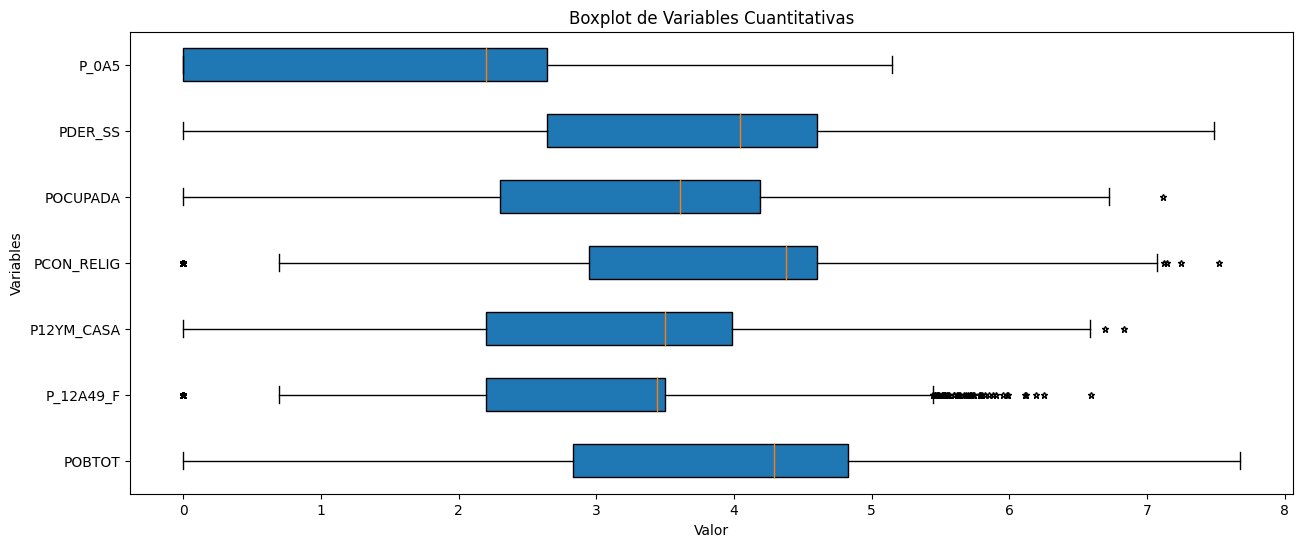

In [18]:
plt.figure(figsize=(15, 6))
cuanti_bplot = plt.boxplot(df4.values, labels=df4.columns, vert=False,patch_artist=True, flierprops=dict(marker='*', markersize=5))

plt.xlabel('Valor')
plt.ylabel('Variables')
plt.title('Boxplot de Variables Cuantitativas')
plt.show()

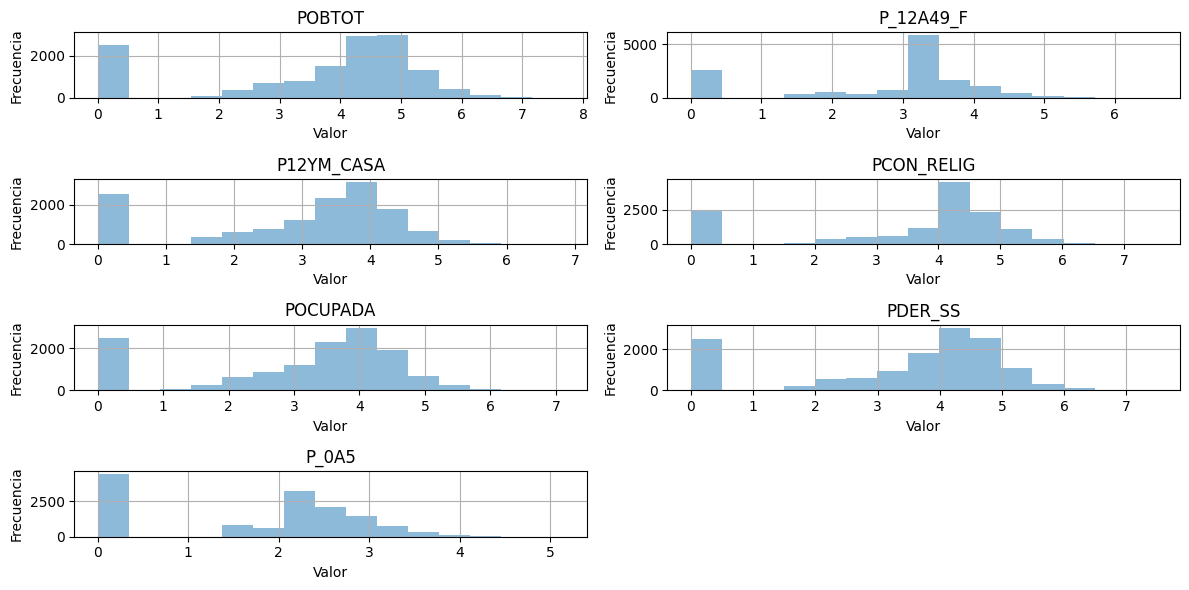

In [19]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iterar sobre las columnas y crear un histograma para cada una
for i, columna in enumerate(df4.columns, start=1):
    plt.subplot(4,2,i)  # Configurar el subplot
    plt.hist(df4[columna], bins=15, alpha=0.5)  # Crear el histograma
    plt.title(columna)  # Añadir título a cada subplot
    plt.xlabel('Valor')  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.grid(True)  # Mostrar la cuadrícula

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

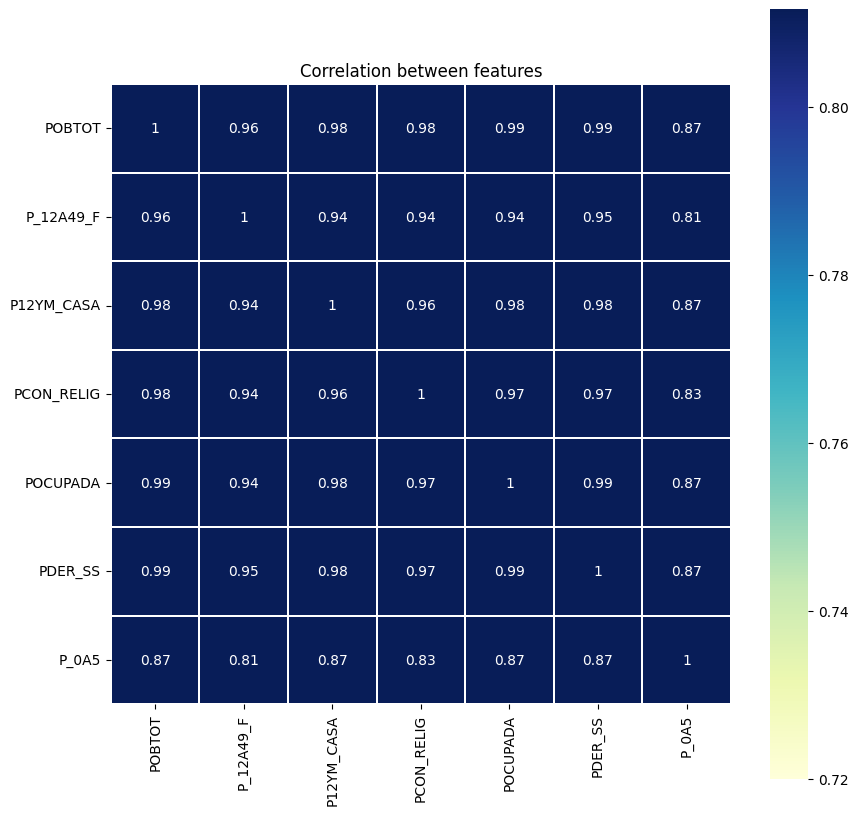

In [20]:
corr=df4.corr()
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
plt.show()

In [21]:
df4.to_csv('Querétaro_actualizado.csv', sep=',', index=False, encoding='utf-8')

In [113]:
DeepnoteChart(df4, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"P_0A5"},"y":{"sort":null,"scale":{"type":"linear"},"aggregate":"count"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

## Tabasco

In [88]:
df_tabasco=pd.read_csv('/work/Tabasco/conjunto_de_datos_tabasco.csv')
df_tabasco.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,27,Tabasco,0,Total de la entidad Tabasco,0,Total de la entidad,0000,0,2402598,1228927,...,118527,563390,228487,276817,66338,31004,54983,96508,404524,25731
1,27,Tabasco,1,Balancán,0,Total del municipio,0000,0,58524,29282,...,2960,12347,3499,7392,486,227,1907,3607,12387,993
2,27,Tabasco,1,Balancán,1,Total de la localidad urbana,0000,0,13944,7272,...,625,3917,1534,2402,302,133,305,271,2258,75
3,27,Tabasco,1,Balancán,1,Total AGEB urbana,0401,0,1962,1017,...,144,587,244,353,57,15,53,38,330,12
4,27,Tabasco,1,Balancán,1,Balancán,0401,1,54,32,...,9,16,13,13,4,0,*,*,6,0


In [89]:
df_modelo=df_tabasco[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','MZA','NOM_LOC','AGEB','POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_modelo=df_modelo.replace('*',pd.NA)
series_religiones = df_modelo['PCATOLICA'].astype('Int64') + df_modelo['PRO_CRIEVA'].astype('Int64') + df_modelo['POTRAS_REL'].astype('Int64')
series_12_a_49 = df_modelo['P_12A14_F'].astype("Int64") + df_modelo['P_15A49_F'].astype("Int64")
df_modelo.insert(13,'Personas c/religion',series_religiones)
df_modelo.insert(8,'Mujeres de 12-49',series_12_a_49)
df_modelo=df_modelo.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5'],axis=1)
df_modelo.rename(columns={'PDER_SS':'Personas C/Servicio de Salud','VPH_SINCINT': 'Personas S/Internet','GRAPROES': 'Prom. Grado Escolar','POCUPADA': 'Personas Ocupadas','POBTOT': 'Poblacion Total','P12YM_CASA': 'Personas Casadas','P_0A2': 'Poblacion de 0 a 5','PSIN_RELIG':'Personas s/religion','PROM_HNV':'Promedio de nacidos','GRAP':'Personas Separadas'},inplace =True)
df_modelo.query("~NOM_LOC.str.startswith('Total')",inplace=True)
df_modelo=df_modelo.iloc[:,6:]
df_modelo.drop(columns=['NOM_LOC','AGEB','Prom. Grado Escolar'],inplace=True,axis=1)
df_modelo=df_modelo.astype('Float64')

In [90]:
serie_predict=df_modelo['Poblacion de 0 a 5']
medias=df_modelo.mean()
df_modelo=df_modelo.fillna(medias)
df_modelo['Poblacion de 0 a 5']=serie_predict
df_sin_predecir = df_modelo.copy()
df_modelo.dropna(inplace=True)
df_modelo



,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Personas S/Internet,Personas C/Servicio de Salud
6,31.772852,28.0,0.0,28.0,15.0,0.0,15.0,4.0,20.0
8,38.0,110.0,4.0,97.0,46.0,13.0,60.0,16.0,80.0
9,31.772852,40.0,0.0,79.123548,20.0,9.906078,27.0,5.0,23.0
10,31.772852,52.0,3.0,49.0,19.0,3.0,25.0,7.0,36.0
11,37.0,120.0,4.0,112.0,46.0,8.0,67.0,27.0,72.0
...,...,...,...,...,...,...,...,...,...
17776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df_sin_predecir

,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Personas S/Internet,Personas C/Servicio de Salud
4,20.0,54.0,<NA>,53.0,27.0,9.906078,20.0,6.0,45.0
5,14.0,44.0,<NA>,42.0,20.0,9.906078,25.0,4.0,32.0
6,31.772852,28.0,0.0,28.0,15.0,0.0,15.0,4.0,20.0
7,8.0,44.0,<NA>,44.0,21.0,0.0,24.0,8.0,37.0
8,38.0,110.0,4.0,97.0,46.0,13.0,60.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...
17781,31.772852,15.0,<NA>,79.123548,37.621844,9.906078,41.53996,13.429552,61.453969
17782,31.772852,5.0,<NA>,79.123548,37.621844,9.906078,41.53996,13.429552,61.453969
17783,31.772852,8.0,<NA>,79.123548,37.621844,9.906078,41.53996,13.429552,61.453969
17784,31.772852,2.0,<NA>,79.123548,37.621844,9.906078,41.53996,13.429552,61.453969


In [25]:
df_concat=df_tabasco.iloc[:,1:7]
df_concat
df_exp=pd.concat([df_concat,df_modelo],axis=1)
df_exp.dropna(inplace=True)
df_exp.to_csv('df_tabasco_completo.csv',index=False)

In [30]:
corr_t=df_modelo.corr()
corr_t

,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas s/religion,Personas Ocupadas,Personas S/Internet,Personas C/Servicio de Salud
Mujeres de 12-49,1.000000,0.980093,0.928639,0.912460,0.977369,0.754651,0.964203,0.905219,0.957459
Poblacion Total,0.980093,1.000000,0.946360,0.929637,0.995625,0.765264,0.983781,0.916706,0.976835
Poblacion de 0 a 5,0.928639,0.946360,1.000000,0.886937,0.945815,0.754706,0.923688,0.923898,0.913889
Personas c/religion,0.912460,0.929637,0.886937,1.000000,0.925529,0.674512,0.914125,0.855947,0.900596
Personas Casadas,0.977369,0.995625,0.945815,0.925529,1.000000,0.761770,0.980587,0.918859,0.971814
Personas s/religion,0.754651,0.765264,0.754706,0.674512,0.761770,1.000000,0.746075,0.724152,0.751557
Personas Ocupadas,0.964203,0.983781,0.923688,0.914125,0.980587,0.746075,1.000000,0.889109,0.962446
Personas S/Internet,0.905219,0.916706,0.923898,0.855947,0.918859,0.724152,0.889109,1.000000,0.871192
Personas C/Servicio de Salud,0.957459,0.976835,0.913889,0.900596,0.971814,0.751557,0.962446,0.871192,1.000000


<AxesSubplot: >

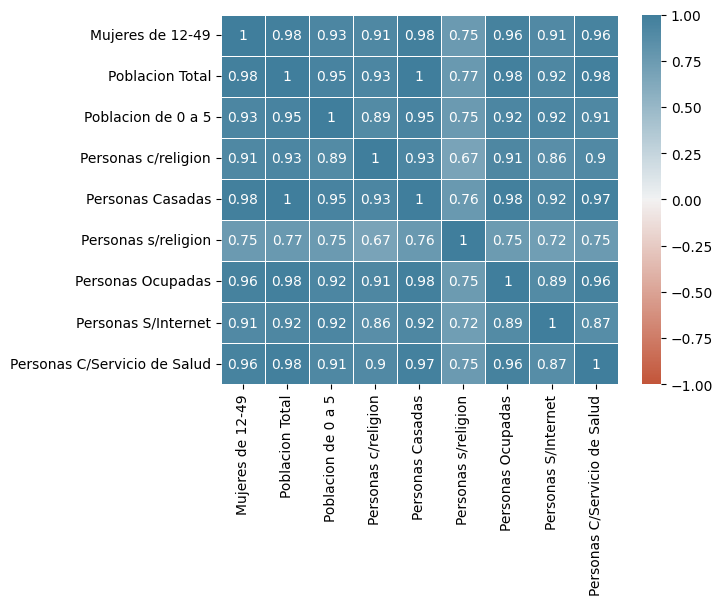

In [32]:
sns.heatmap(
    data=corr_t,
    vmax=1,
    center=0,
    vmin=-1,
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    annot=True,
    linecolor='white',
    linewidths=0.4
)

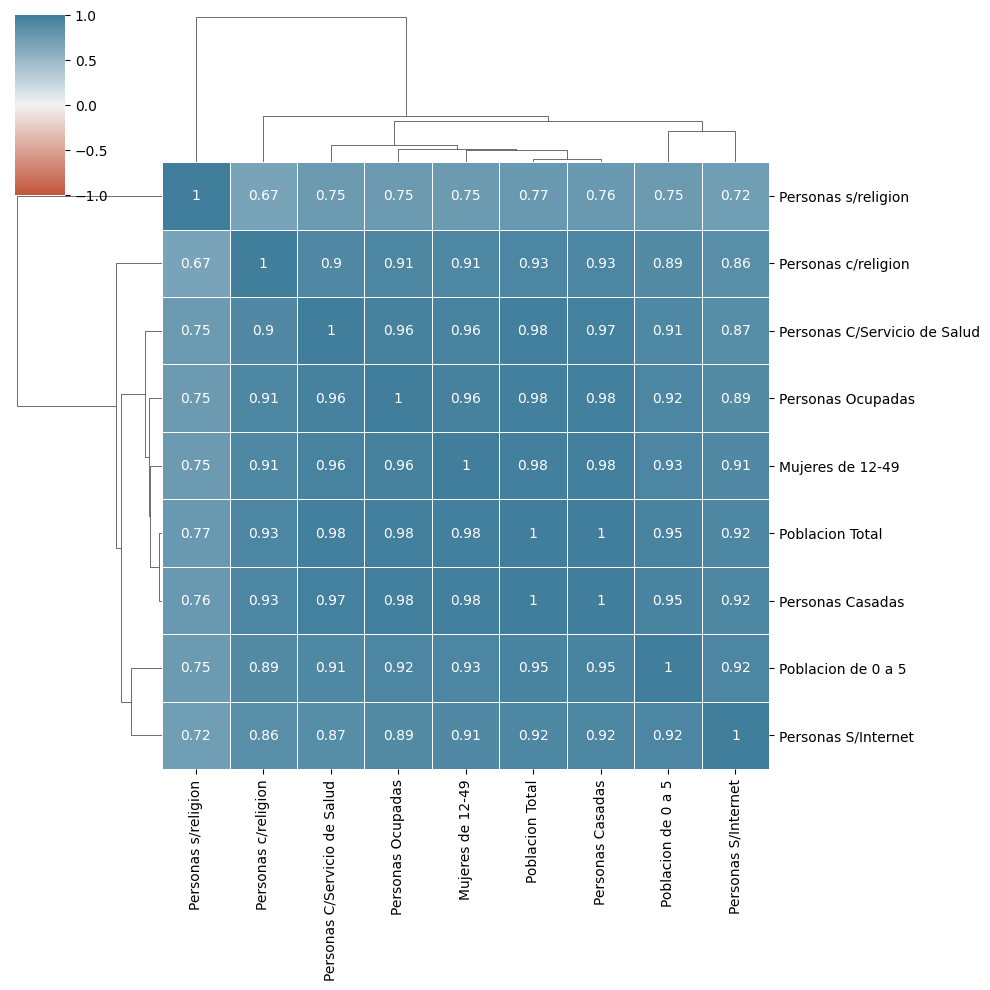

In [33]:
sns.clustermap(
    data=corr_t,
    vmax=1,
    center=0,
    vmin=-1,
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    annot=True,
    linecolor='white',
    linewidths=0.4
)

In [72]:
df_tabasco_transf = df_modelo

# aplica la transformacion a cada columna
df_tabasco_transf = df_tabasco_transf.apply(log_transform)

#df_tabasco_transf

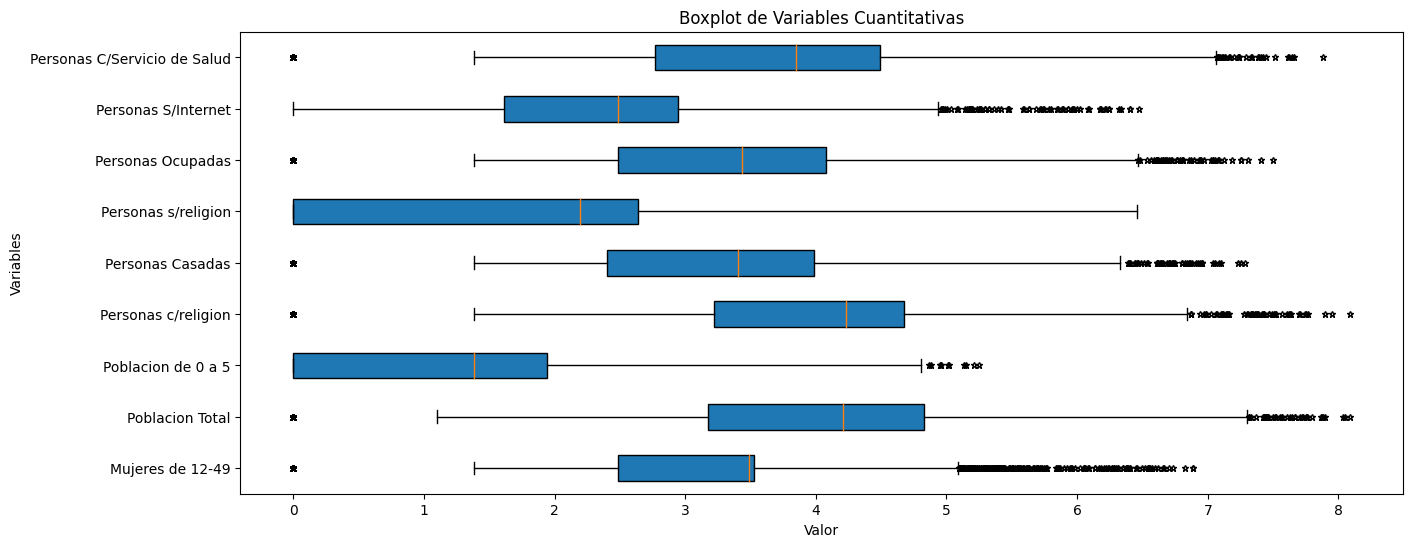

In [73]:
plt.figure(figsize=(15, 6))
plot_tabasco_transf = plt.boxplot(df_tabasco_transf.values, labels=df_tabasco_transf.columns, vert=False,patch_artist=True, flierprops=dict(marker='*', markersize=5))

plt.xlabel('Valor')
plt.ylabel('Variables')
plt.title('Boxplot de Variables Cuantitativas')
plt.show()

In [92]:
df_tabasco_final = df_tabasco_transf
df_tabasco_final.to_csv('logs_modelos_tabasco.csv',index=False)

<Figure size 1000x1000 with 0 Axes>

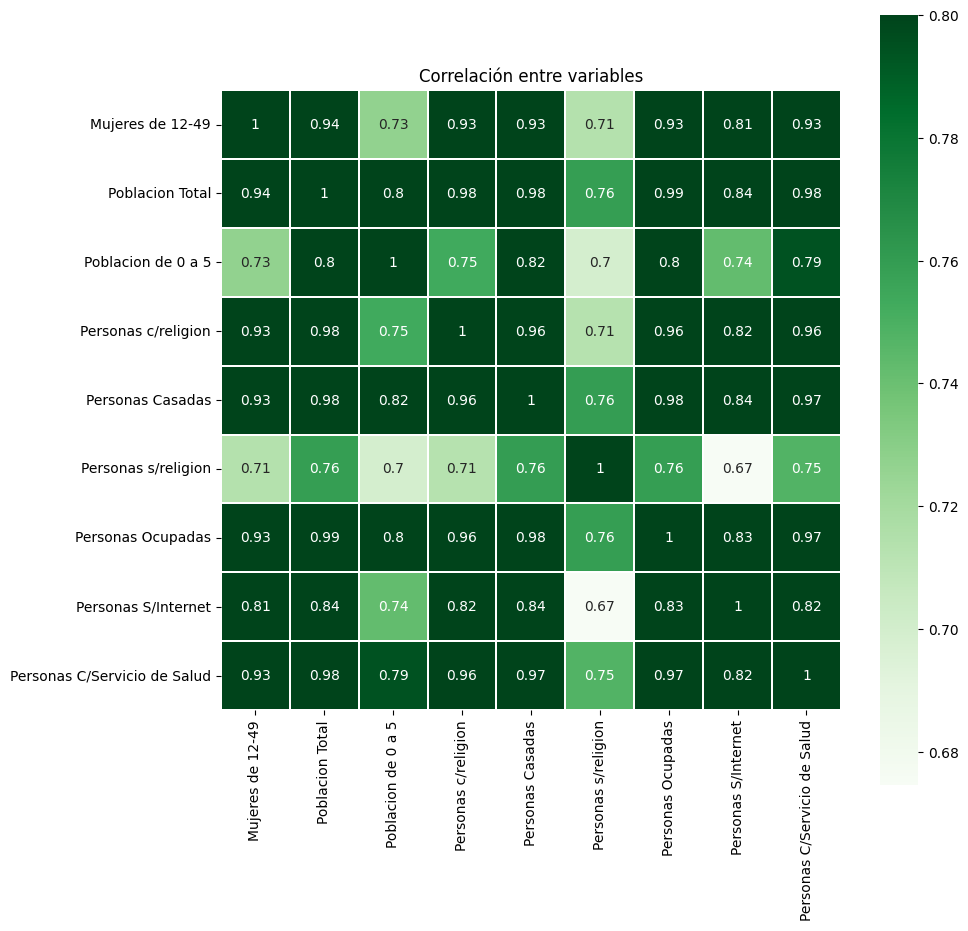

In [76]:
corr_tabasco=df_tabasco_final.corr()
plt.figure(figsize=(10, 10))

heatmap = sns.hcorr_tabasco=df_tabasco_final.corr()
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(corr_tabasco, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Greens',linecolor="white")
plt.title('Correlación entre variables');
plt.show()

### Coahuila

In [41]:
df_co=pd.read_csv('/work/Coahuila/conjunto_de_datos_ageb_urbana_05_cpv2020.csv')

In [45]:
df_co = df_co.replace('*', pd.NA)
df_co_limpio=df_co[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB','MZA','POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_co_limpio=df_co_limpio[df_co_limpio.apply(lambda row:all(row != '*'), axis=1)]
df_co_limpio=df_co_limpio[df_co_limpio.apply(lambda row:all(row != 'N/D'), axis=1)]
series_religiones=df_co_limpio['PCATOLICA'].astype('Int64')+df_co_limpio['PRO_CRIEVA'].astype('Int64')+df_co_limpio['POTRAS_REL'].astype('Int64')
series_14_a_59=df_co_limpio['P_12A14_F'].astype('Int64')+df_co_limpio['P_15A49_F'].astype('Int64')
df_co_limpio['P_0A2']=df_co_limpio['P_0A2'].astype('Int64')+df_co_limpio['P_3A5'].astype('Int64')
df_co_limpio.insert(13,'Personas c/religion',series_religiones)
df_co_limpio.insert(8,'Mujeres de 12-49',series_14_a_59)
df_co_limpio=df_co_limpio.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5'],axis=1)
df_co_limpio.rename(columns={'PDER_SS':'Personas C/Servicio de Salud','VPH_SINCINT': 'Personas S/Internet','GRAPROES': 'Prom. Grado Escolar','POCUPADA': 'Personas Ocupadas','POBTOT': 'Poblacion Total','P12YM_CASA': 'Personas Casadas','P_0A2': 'Poblacion de 0 a 5','PSIN_RELIG':'Personas s/religion','PROM_HNV':'Promedio de nacidos','GRAP':'Personas Separadas'},inplace =True)
df_co_limpio.query("~NOM_LOC.str.startswith('Total')",inplace=True)
df_co_limpio['Personas Casadas']=df_co_limpio['Personas Casadas'].astype('Int64')
df_co_limpio["Personas s/religion"] = df_co_limpio["Personas s/religion"].astype("Int64")
df_co_limpio["Personas Ocupadas"] = df_co_limpio["Personas Ocupadas"].astype("Int64")
df_co_limpio["Prom. Grado Escolar"] = df_co_limpio["Prom. Grado Escolar"].astype("Float64")
df_co_limpio["Personas S/Internet"] = df_co_limpio["Personas S/Internet"].astype("Int64")
df_co_limpio["Personas C/Servicio de Salud"] = df_co_limpio["Personas C/Servicio de Salud"].astype("Int64")


In [47]:
df_co_prom = df_co_limpio.drop(['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB','MZA', 'Personas s/religion','Personas S/Internet'], axis =1)
df_co_prom = df_co_prom.astype("Float64")

In [51]:
serie_co_pred=df_co_prom['Poblacion de 0 a 5']
medias_co=df_co_prom.mean()
df_co_prom=df_co_prom.fillna(medias_co)
df_co_prom

,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas Ocupadas,Prom. Grado Escolar,Personas C/Servicio de Salud
4,15.456864,5.0,7.459091,47.675835,23.416772,24.873125,8.907377,43.271413
5,3.0,12.0,7.459091,8.0,7.0,8.0,11.9,10.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,15.456864,43.0,7.459091,30.0,26.0,14.0,9.86,32.0
8,5.0,18.0,7.459091,17.0,8.0,6.0,12.56,11.0
...,...,...,...,...,...,...,...,...
61051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61052,15.456864,5.0,7.459091,47.675835,23.416772,24.873125,8.907377,43.271413
61053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df_co_transf = df_co_prom

# aplica la transformacion a cada columna
df_co_transf = df_co_transf.apply(log_transform)

df_co_transf

,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas Ocupadas,Prom. Grado Escolar,Personas C/Servicio de Salud
4,2.800743,1.791759,2.135242,3.885183,3.195270,3.253205,2.293280,3.790339
5,1.386294,2.564949,2.135242,2.197225,2.079442,2.197225,2.557227,2.397895
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.800743,3.784190,2.135242,3.433987,3.295837,2.708050,2.385086,3.496508
8,1.791759,2.944439,2.135242,2.890372,2.197225,1.945910,2.607124,2.484907
...,...,...,...,...,...,...,...,...
61051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61052,2.800743,1.791759,2.135242,3.885183,3.195270,3.253205,2.293280,3.790339
61053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
61054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


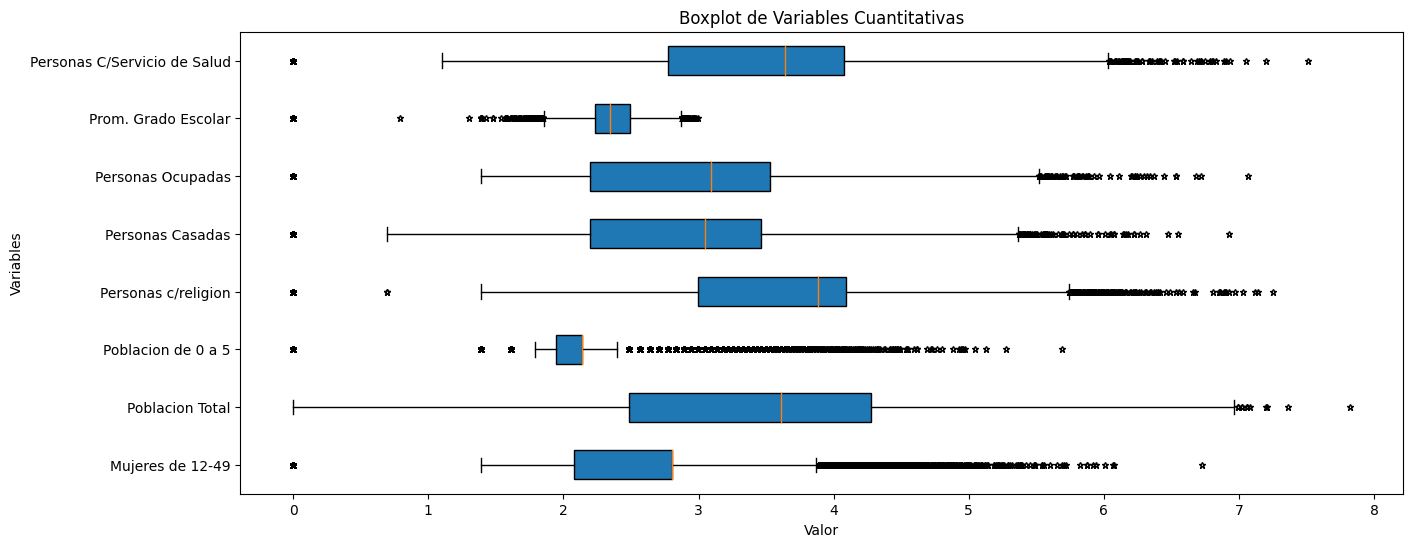

In [58]:
plt.figure(figsize=(15, 6))
plot_co_transf = plt.boxplot(df_co_transf.values, labels=df_co_transf.columns, vert=False,patch_artist=True, flierprops=dict(marker='*', markersize=5))

plt.xlabel('Valor')
plt.ylabel('Variables')
plt.title('Boxplot de Variables Cuantitativas')
plt.show()

In [105]:
df_co_final = df_co_transf
#df_co_final = pd.concat([df_co_final, df_co_prom['Poblacion de 0 a 5']], axis = 1)

In [107]:
df_co_final.head(10)

,Mujeres de 12-49,Poblacion Total,Poblacion de 0 a 5,Personas c/religion,Personas Casadas,Personas Ocupadas,Prom. Grado Escolar,Personas C/Servicio de Salud
4,2.800743,1.791759,2.135242,3.885183,3.195270,3.253205,2.293280,3.790339
5,1.386294,2.564949,2.135242,2.197225,2.079442,2.197225,2.557227,2.397895
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.800743,3.784190,2.135242,3.433987,3.295837,2.708050,2.385086,3.496508
8,1.791759,2.944439,2.135242,2.890372,2.197225,1.945910,2.607124,2.484907
9,2.800743,2.397895,0.000000,2.302585,1.945910,1.609438,2.140066,2.397895
10,2.800743,3.663562,2.135242,3.885183,3.044522,2.995732,2.223542,3.135494
11,2.800743,2.079442,2.135242,1.945910,3.195270,1.609438,2.564949,0.000000
12,2.800743,3.178054,2.135242,3.178054,2.639057,2.302585,2.014903,2.564949
13,3.367296,4.304065,2.302585,4.007333,3.332205,3.178054,2.328253,3.737670


<Figure size 1000x1000 with 0 Axes>

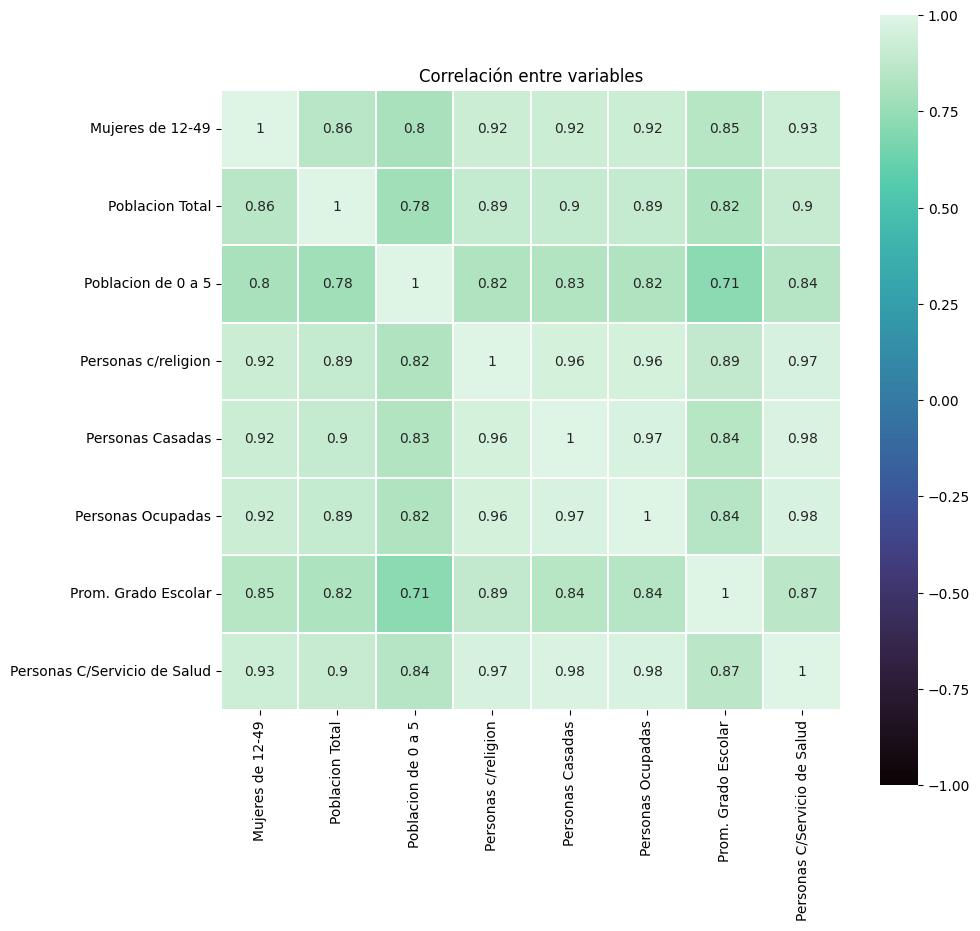

In [111]:
corr_co=df_co_final.corr()
plt.figure(figsize=(10, 10))

heatmap = sns.hcorr_tabasco=df_co_final.corr()
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(corr_co, vmax=1, vmin =-1, linewidths=0.01,
            square=True,annot=True,cmap='mako',linecolor="white")
plt.title('Correlación entre variables');
plt.show()

In [108]:
df_co_final.to_csv('coahuilafinal.csv', sep=',', index=False, encoding='utf-8')

In [109]:
df_co_final.shape

(59062, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0848c89-aa3f-4842-a14c-1735a6491904' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>